In [1]:
import pandas as pd
from collections import Counter
import re
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


import glob
from tqdm.notebook import tqdm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity

from scipy import sparse
from scipy.sparse.linalg import svds


from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\upadh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\upadh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df4model = pd.read_csv('../data/df4model.csv')

In [3]:
categories = ['icd_E11', 'icd_E78','icd_E87', 'icd_F32', 'icd_I16', 'icd_I50', 'icd_N17', 'icd_Y92','icd_Z85']

variables = [ 'history_present_illness', 'past_medcal_history', 'social_history', 'family_history',
       'physical_exam', 'pertinent_results', 'hospital_course',
       'medication_on_admission', 'medication_on_discharge',
       'discharge_disposition', 'discharge_diagnosis', 'discharge_condition',
       'discharge_instruction', 'followup_instruction'] 

df4model['dis_mer'] = (df4model['discharge_disposition']+ 
                        df4model['discharge_diagnosis']+
                        df4model['discharge_condition']+
                        df4model['discharge_instruction'])#these are object do we need to use astype(str)

# train, test = train_test_split(df4model, random_state=42, test_size=0.33, shuffle=True)
# X_train = train.discharge_instruction
# X_test = test.discharge_instruction
# y_train = train[categories]
# y_test = test[categories]

# print(X_train.shape)
# print(X_test.shape)

NameError: name 'X_train' is not defined

In [7]:
print(df4model.head())
print('--------------')
print(df4model.tail())
print('--------------')
print(df4model.shape)
print('--------------')
print(df4model.columns)
print('--------------')


   subject_id   hadm_id  icd  \
0    10000980  29654838  I50   
1    10000980  26913865  I50   
2    10000980  24947999  I50   
3    10000980  25242409  I50   
4    10000980  25911675  I50   

                                          long_title  \
0              Congestive heart failure, unspecified   
1            Acute on chronic systolic heart failure   
2            Acute on chronic systolic heart failure   
3              Congestive heart failure, unspecified   
4  Acute on chronic systolic (congestive) heart f...   

                chief_complaint          surgical_invasive_procedure  \
0          Shortness of breath                                 None    
1                      dyspnea             Cardiac catheterization     
2  Dyspnea and chest tightness    Pharmacologic nuclear stress test    
3                          DVT                                  EGD    
4              fatigue, anemia                                 None    

                             history_

<Axes: >

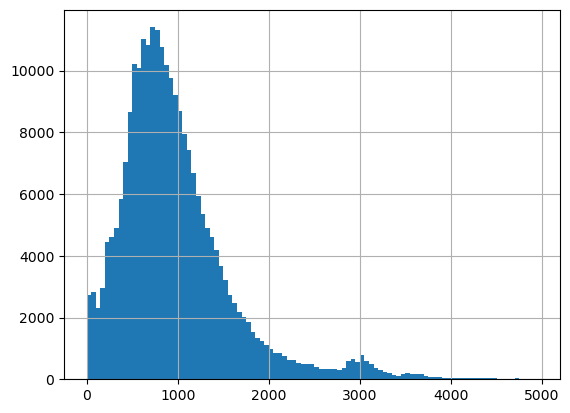

In [9]:
df4model['dis_mer'].str.len().hist(bins = np.arange(0,5000,50))

In [13]:

# !pip install wordcloud



     -------------------------------------- 153.3/153.3 kB 1.8 MB/s eta 0:00:00


In [14]:
from wordcloud import WordCloud, STOPWORDS

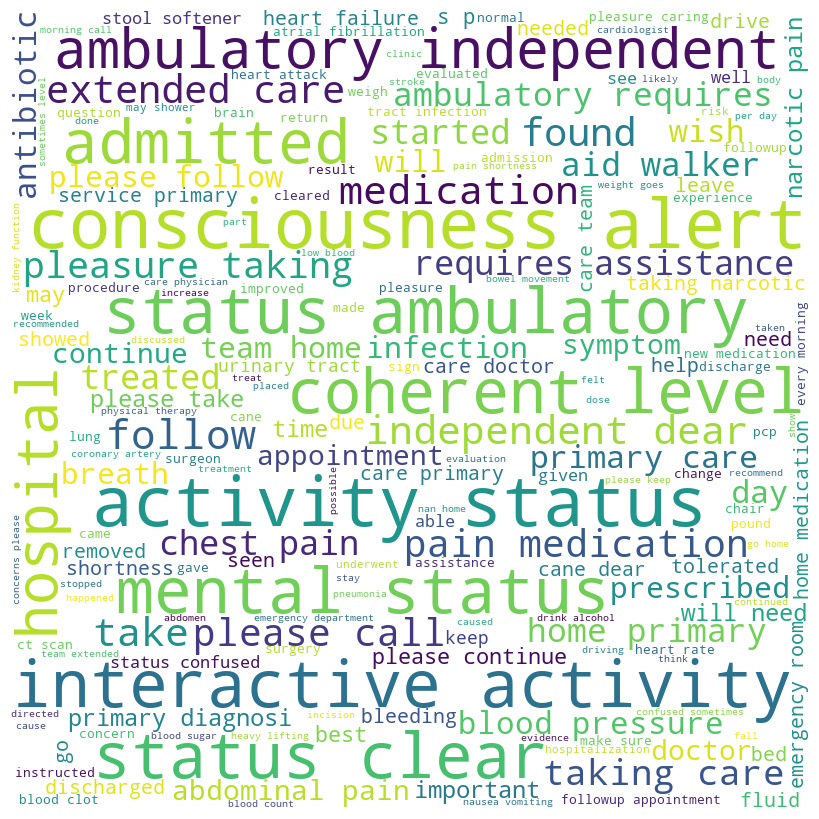

In [16]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df4model.dis_mer:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [17]:
df4model.columns

Index(['subject_id', 'hadm_id', 'icd', 'long_title', 'chief_complaint',
       'surgical_invasive_procedure', 'history_present_illness',
       'past_medcal_history', 'social_history', 'family_history',
       'physical_exam', 'pertinent_results', 'hospital_course',
       'medication_on_admission', 'medication_on_discharge',
       'discharge_disposition', 'discharge_diagnosis', 'discharge_condition',
       'discharge_instruction', 'followup_instruction', 'icd_E11', 'icd_E78',
       'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50', 'icd_N17', 'icd_Y92',
       'icd_Z85', 'dis_mer'],
      dtype='object')

In [29]:
len(df4model.loc[df4model['icd_E11']==1]['subject_id'].unique()) #32018
len(df4model.loc[df4model['icd_E78']==1]['subject_id'].unique()) #57628
len(df4model.loc[df4model['icd_E87']==1]['subject_id'].unique()) #36914
len(df4model.loc[df4model['icd_F32']==1]['subject_id'].unique()) #27325
len(df4model.loc[df4model['icd_I16']==1]['subject_id'].unique()) #44561
len(df4model.loc[df4model['icd_I50']==1]['subject_id'].unique()) #23179
len(df4model.loc[df4model['icd_N17']==1]['subject_id'].unique()) #30883
len(df4model.loc[df4model['icd_Y92']==1]['subject_id'].unique()) #37698
len(df4model.loc[df4model['icd_Z85']==1]['subject_id'].unique()) #23920

23920

In [ ]:
# df4model.loc[df4model['icd_E11']==1]['subject_id'].unique()

In [30]:
from venn import venn

<Axes: >

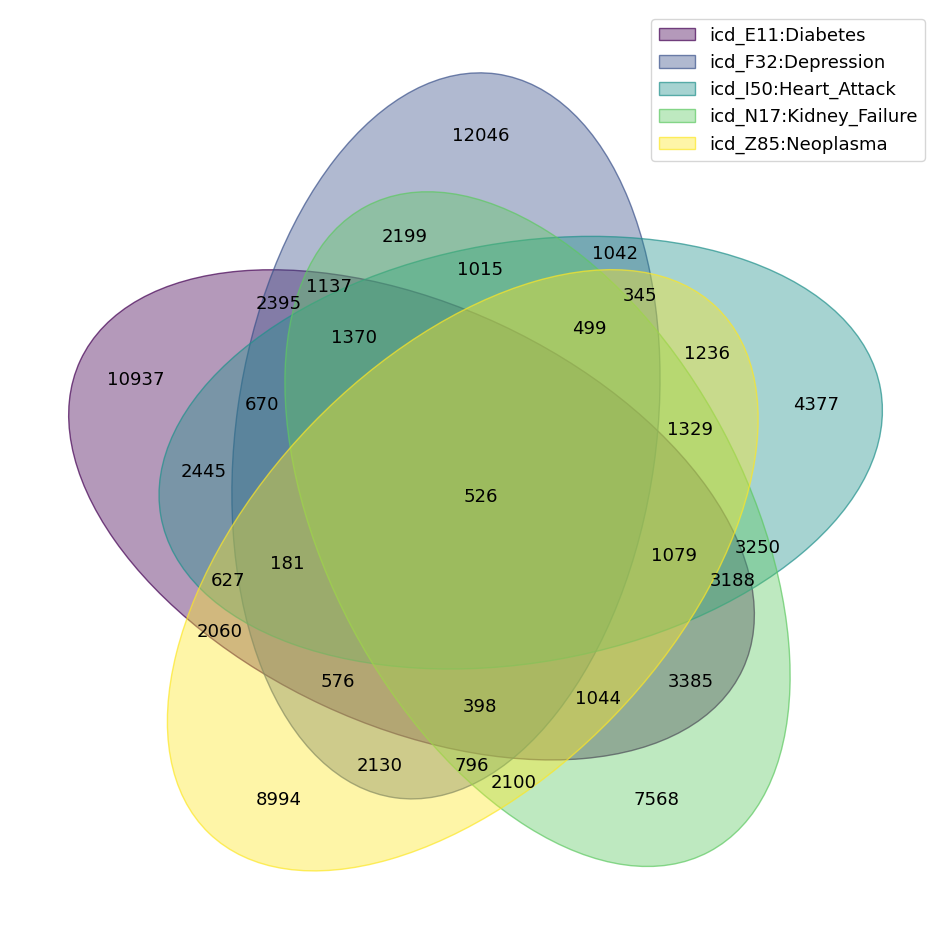

In [45]:
labels=['icd_E11:Diabetes', 
        'icd_E78:Hypertension',
       'icd_E87:AcidBaseDisorder', 
        'icd_F32:Depression', 
        'icd_I16:Hyperlipidemia',
        'icd_I50:Heart_Attack',
        'icd_N17:Kidney_Failure',
        'icd_Y92:Accident',
       'icd_Z85:Neoplasma']

sets = {
    labels[0]: set(df4model.loc[df4model['icd_E11']==1]['subject_id'].unique()),
#     labels[1]: set(df4model.loc[df4model['icd_E78']==1]['subject_id'].unique()),
#     labels[2]: set(df4model.loc[df4model['icd_E87']==1]['subject_id'].unique()),
    labels[3]: set(df4model.loc[df4model['icd_F32']==1]['subject_id'].unique()),
#     labels[4]: set(df4model.loc[df4model['icd_I16']==1]['subject_id'].unique()),
    labels[5]: set(df4model.loc[df4model['icd_I50']==1]['subject_id'].unique()),
    labels[6]: set(df4model.loc[df4model['icd_N17']==1]['subject_id'].unique()),
#     labels[7]: set(df4model.loc[df4model['icd_Y92']==1]['subject_id'].unique()),
    labels[8]: set(df4model.loc[df4model['icd_Z85']==1]['subject_id'].unique())
    }
fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
                 
                 